# Proyek Analisis Data: Air Quality
- **Nama:** Salwa Sabira
- **Email:** slwsbr04@gmail.com
- **ID Dicoding:** MC002D5X1313

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 \
Bagaiman tren perubahan PM2.5, PM10, SO2, NO2, CO, dan O3 dari tahun 2013 sampai 2017 di kota Dingling, Gucheng, dan Guanyuan?
- Pertanyaan 2 \
Bagaimana karasteristik polusi udara di kota Dingling, Gucheng, dan Guanyuan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PRSA_Data_Guanyuan_20130301-20170228.csv to PRSA_Data_Guanyuan_20130301-20170228.csv
Saving PRSA_Data_Gucheng_20130301-20170228.csv to PRSA_Data_Gucheng_20130301-20170228.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PRSA_Data_Dingling_20130301-20170228.csv to PRSA_Data_Dingling_20130301-20170228.csv


In [ ]:
# import data kota Dingling
Dingling_df = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv")
Dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [ ]:
# import data kota Guanyuan
Guanyuan_df = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")
Guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [ ]:
# import data kota Gucheng
Gucheng_df = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv")
Gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [ ]:
# menggabungkan ketiga data agar lebih mudah di akses
air_quality_df = pd.concat([Dingling_df, Guanyuan_df, Gucheng_df], ignore_index = True)
air_quality_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


**Insight:**
- Mendapatkan data dari kota Dingling, Guanyuan, Gucheng yang dapat di akses untuk analisis data
- Di dalam data yang di dapatkan terdapat variable year, month, hour, PM2.5, PM10, SO2, NO2, CO,	O3,	TEMP,	PRES,	DEWP,	RAIN yang dapat digunakan untuk analisis data

### Assessing Data

Menilai Data Air Quality

In [ ]:
# mengakses info yang ada pada data air quality
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105192 entries, 0 to 105191
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       105192 non-null  int64  
 1   year     105192 non-null  int64  
 2   month    105192 non-null  int64  
 3   day      105192 non-null  int64  
 4   hour     105192 non-null  int64  
 5   PM2.5    103151 non-null  float64
 6   PM10     103726 non-null  float64
 7   SO2      103481 non-null  float64
 8   NO2      102631 non-null  float64
 9   CO       100026 non-null  float64
 10  O3       102076 non-null  float64
 11  TEMP     105068 non-null  float64
 12  PRES     105072 non-null  float64
 13  DEWP     105068 non-null  float64
 14  RAIN     105078 non-null  float64
 15  wd       104812 non-null  object 
 16  WSPM     105093 non-null  float64
 17  station  105192 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 14.4+ MB


In [ ]:
# mengecek jumlah missing values pada data air quality
air_quality_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,2041
PM10,1466
SO2,1711
NO2,2561
CO,5166


In [ ]:
# mengecek jumlah data yang duplikat pada data air quality
print("Jumlah duplikasi: ", air_quality_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# menampilkan statistika deskriptif pada data air quality
air_quality_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,105192.000000,105192.000000,105192.00000,105192.000000,105192.000000,103151.000000,103726.000000,103481.000000,102631.000000,100026.000000,102076.000000,105068.000000,105072.000000,105068.000000,105078.000000,105093.000000
mean,17532.500000,2014.662560,6.52293,15.729637,11.500000,77.608166,103.926002,14.909902,47.228068,1167.952962,60.663289,13.711711,1009.479606,2.413227,0.064081,1.635232
std,10122.153028,1.177202,3.44872,8.800134,6.922219,79.233628,90.810455,20.543097,35.775742,1117.126203,56.381709,11.353004,10.390157,13.781160,0.836361,1.242115
min,1.000000,2013.000000,1.00000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.800000,982.400000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.00000,8.000000,5.750000,20.000000,35.000000,2.000000,19.000000,500.000000,14.000000,3.400000,1001.000000,-9.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.00000,16.000000,11.500000,53.000000,82.000000,7.000000,39.000000,800.000000,50.000000,14.700000,1009.100000,2.900000,0.000000,1.300000
75%,26298.250000,2016.000000,10.00000,23.000000,17.250000,108.000000,146.000000,18.000000,69.000000,1400.000000,86.000000,23.300000,1017.800000,15.000000,0.000000,2.100000
max,35064.000000,2017.000000,12.00000,31.000000,23.000000,881.000000,999.000000,500.000000,276.000000,10000.000000,500.000000,41.600000,1042.000000,28.500000,72.500000,12.000000


**Insight:**
- Di dapatkan type dari dataset air quality adalah integer, float, dan ada object
- Masih banyak missing values pada dataset air quality sehingga harus melakukan cleaning data
- Tidak ada data yang duplikat pada dataset air quality
- Telah dihitung statistika deskriptif dari dataset air quality

### Cleaning Data

In [ ]:
# isi missing values dengan mean untuk beberapa variable yang akan digunakan
air_quality_df.fillna({
    'PM2.5' : air_quality_df['PM2.5'].mean(),
    'PM10' : air_quality_df['PM10'].mean(),
    'SO2' : air_quality_df['SO2'].mean(),
    'NO2' : air_quality_df['NO2'].mean(),
    'CO' : air_quality_df['CO'].mean(),
    'O3' : air_quality_df['O3'].mean()
}, inplace=True)

# untuk variable yang tidak akan dipakai akan di hapus missing valuesnya
air_quality_df.dropna(subset=['TEMP',	'PRES',	'DEWP',	'RAIN', 'wd', 'WSPM'], inplace=True)

In [ ]:
# cek apakah sudah tidak ada missing values
air_quality_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Telah dilakukan cleaning data dengan mengisi missing values dengan mean dari variable tersebut
- untuk kolom yang tidak digunakan dilakukan cleaning data dengan menghilangkan missing values yang ada
- setelah di cek missing values sudah tidak ada pada dataset

## Exploratory Data Analysis (EDA)

### Explore Air Quality

In [ ]:
# mengelompokkan statistik data berdasarkan station kota
air_quality_df.groupby(by="station").agg({
    "PM2.5" : ["max", "min", "mean", "std"],
    "PM10" : ["max", "min", "mean", "std"],
    "SO2" : ["max", "min", "mean", "std"],
    "NO2" : ["max", "min", "mean", "std"],
    "CO" : ["max", "min", "mean", "std"],
    "O3" : ["max", "min", "mean", "std"],
})

PM2.5                              PM10                              \
            max  min       mean        std    max  min        mean        std   
station                                                                         
Dingling  881.0  3.0  66.141662  71.439046  905.0  2.0   84.043711  78.803127   
Guanyuan  680.0  2.0  82.817160  80.231715  999.0  2.0  108.928136  91.033203   
Gucheng   770.0  2.0  83.647328  82.045998  994.0  2.0  118.639489  96.274044   

            SO2          ...        NO2                  CO         \
            max     min  ...       mean        std      max    min   
station                  ...                                         
Dingling  156.0  0.2856  ...  28.247797  26.150873  10000.0  100.0   
Guanyuan  293.0  1.0000  ...  57.661872  34.845736  10000.0  100.0   
Gucheng   500.0  0.2856  ...  55.658960  36.145767  10000.0  100.0   

                                       O3                                
                 mean          std    max     min       mean        std  
station                                                                  
Dingling   917.939176   876.402023  500.0  0.2142  68.391595  52.874310  
Guanyuan  1265.583342  1135.643734  415.0  0.2142  56.001750  56.486075  
Gucheng   1316.337591  1184.982695  450.0  0.2142  57.882833  56.459572  

[3 rows x 24 columns]

Kita akan menghitung apakah di ketiga kota tersebut polusi udara melewati batas aman atau tidak. Parameter ini bersumber dari WHO : https://www.who.int/news-room/feature-stories/detail/what-are-the-who-air-quality-guidelines

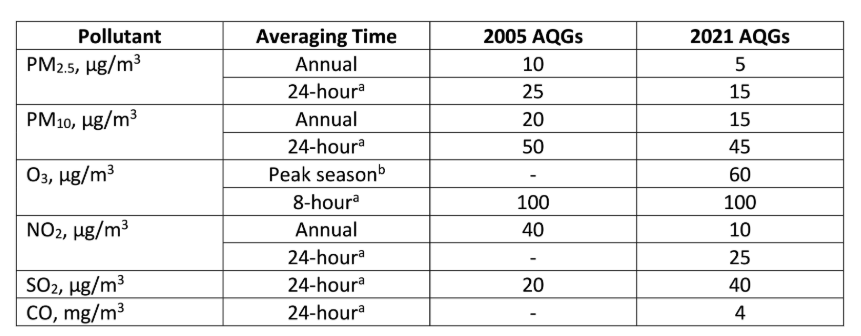

In [ ]:
# menghitung rata-rata harian untuk PM2.5, PM10, dan SO2
daily_avg_pollutant = air_quality_df.groupby(["station", "year", "month", "day"])[['PM2.5', 'PM10','SO2']].mean().reset_index()
daily_avg_pollutant.head()

,station,year,month,day,PM2.5,PM10,SO2
0,Dingling,2013,3,1,6.375000,14.535500,3.000000
1,Dingling,2013,3,2,34.041667,41.708333,25.083333
2,Dingling,2013,3,3,43.833333,65.333333,19.579579
3,Dingling,2013,3,4,17.541667,32.038583,9.166667
4,Dingling,2013,3,5,105.375000,117.208333,36.375000


In [ ]:
# Copy dataframe agar tidak merusak data asli
df = air_quality_df.copy()

# menghitung rata-rata setiap 8 jam untuk CO3 dan O3
df['CO_8_avg'] = df.groupby("station")['CO'].rolling(window=8, min_periods=6).mean().reset_index(0, drop=True)
df['O3_8_avg'] = df.groupby("station")['O3'].rolling(window=8, min_periods=6).mean().reset_index(0, drop=True)

In [ ]:
# menghitung limit dari pollutant berdasarkan standar WHO tahun 2021
who_limits = {
    'PM2.5' : 15,  # µg/m³ (24 jam)
    'PM10' : 45 ,  # µg/m³ (24 jam)
    'SO2' : 40  ,  # µg/m³ (24 jam)
    'NO2' : 25  ,  # µg/m³ (1 jam)
    'CO' : 4000 ,  # µg/m³ (8 jam)
    'O3' : 100  ,  # µg/m³ (8 jam)
}

# cek apakah rata-rata harian melebihi batas nilai WHO
daily_avg_pollutant['PM2.5_overlimit'] = daily_avg_pollutant['PM2.5'] > who_limits['PM2.5']
daily_avg_pollutant['PM10_overlimit'] = daily_avg_pollutant['PM10'] > who_limits['PM10']
daily_avg_pollutant['SO2_overlimit'] = daily_avg_pollutant['SO2'] > who_limits['SO2']

# cek apakah rata-rata 8 jam melebihi batas WHO
df['CO_overlimit'] = df['CO_8_avg'] > who_limits['CO']
df['O3_overlimit'] = df['O3_8_avg'] > who_limits['O3']

# cek apakah nilai per jam melebihi batas WHO
df['NO2_overlimit'] = df['NO2'] > who_limits['NO2']

In [ ]:
# hitung persentase hari yang melebihi batas WHO untuk PM2.5, PM10, dan SO2
over_limits_percentage_daily = daily_avg_pollutant.groupby("station")[[col for col in daily_avg_pollutant.columns if "overlimit" in col]].mean() * 100

# hitung persentase jam yang melebihi batas WHO untuk CO, O3, NO2
over_limits_percentage_hourly = df.groupby("station")[['CO_overlimit','O3_overlimit','NO2_overlimit']].mean() * 100

# gabungkan hasil
final = over_limits_percentage_daily.merge(over_limits_percentage_hourly, on="station")
final

,PM2.5_overlimit,PM10_overlimit,SO2_overlimit,CO_overlimit,O3_overlimit,NO2_overlimit
station,,,,,,
Dingling,83.983573,66.187543,4.791239,1.005356,18.133646,40.824335
Guanyuan,93.155373,81.314168,12.388775,2.993396,16.473683,82.199731
Gucheng,92.950034,87.132101,9.377139,3.260932,16.751676,76.033010


In [ ]:
# hitung rata-rata polusi tiap tahun
yearly_avg = air_quality_df.groupby(['year', 'station'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
yearly_avg

PM2.5        PM10        SO2        NO2           CO  \
year station                                                               
2013 Dingling   64.948153   79.159671  14.114888  31.329525   901.409577   
     Guanyuan   82.060743  107.699554  21.811525  57.983922  1180.086365   
     Gucheng    81.794447  112.462741  17.643715  61.225642  1276.995692   
2014 Dingling   74.242695   90.848943  14.534632  28.153859   884.833420   
     Guanyuan   88.140770  115.687578  22.904415  63.402687  1348.472727   
     Gucheng    89.031079  133.375062  19.725496  61.815850  1418.234577   
2015 Dingling   64.582536   85.398245  11.355717  27.107993   966.375012   
     Guanyuan   82.322842  106.307544  14.096442  54.826584  1313.641855   
     Gucheng    83.376054  115.927325  13.336361  49.543308  1320.172633   
2016 Dingling   60.258140   80.839025   7.370782  25.915746   880.143223   
     Guanyuan   77.112291  104.585861  11.547624  53.393112  1171.883255   
     Gucheng    77.276892  110.519674  10.267826  49.859869  1170.223675   
2017 Dingling   68.141442   78.588520  13.247344  34.394102  1149.895225   
     Guanyuan   92.320226  116.689760  20.909505  64.534052  1482.952848   
     Gucheng   101.284628  126.414237  20.476211  62.148871  1777.410617   

                      O3  
year station              
2013 Dingling  64.951957  
     Guanyuan  58.649821  
     Gucheng   56.227502  
2014 Dingling  72.239996  
     Guanyuan  55.418927  
     Gucheng   58.933949  
2015 Dingling  71.024960  
     Guanyuan  56.819701  
     Gucheng   61.035232  
2016 Dingling  67.040589  
     Guanyuan  55.146177  
     Gucheng   59.618690  
2017 Dingling  54.242609  
     Guanyuan  45.848092  
     Gucheng   29.491817

**Insight:**
- Setelah dilakukan EDA di dapatkan persentase indikator polutant yang melewati batas parameter WHO, hal ini menyebabkan kualitas udara yang tidak sehat
- Di dapatkan juga rata-rata tahunan yang akan dipakai untuk melihat tren tahunan dari indikator polutant di ketiga kota

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaiman tren perubahan konsentrasi PM2.5, PM10, SO2, NO2, CO, dan O3 dari tahun 2013 sampai 2017 di kota Dingling, Gucheng, dan Guanyuan?

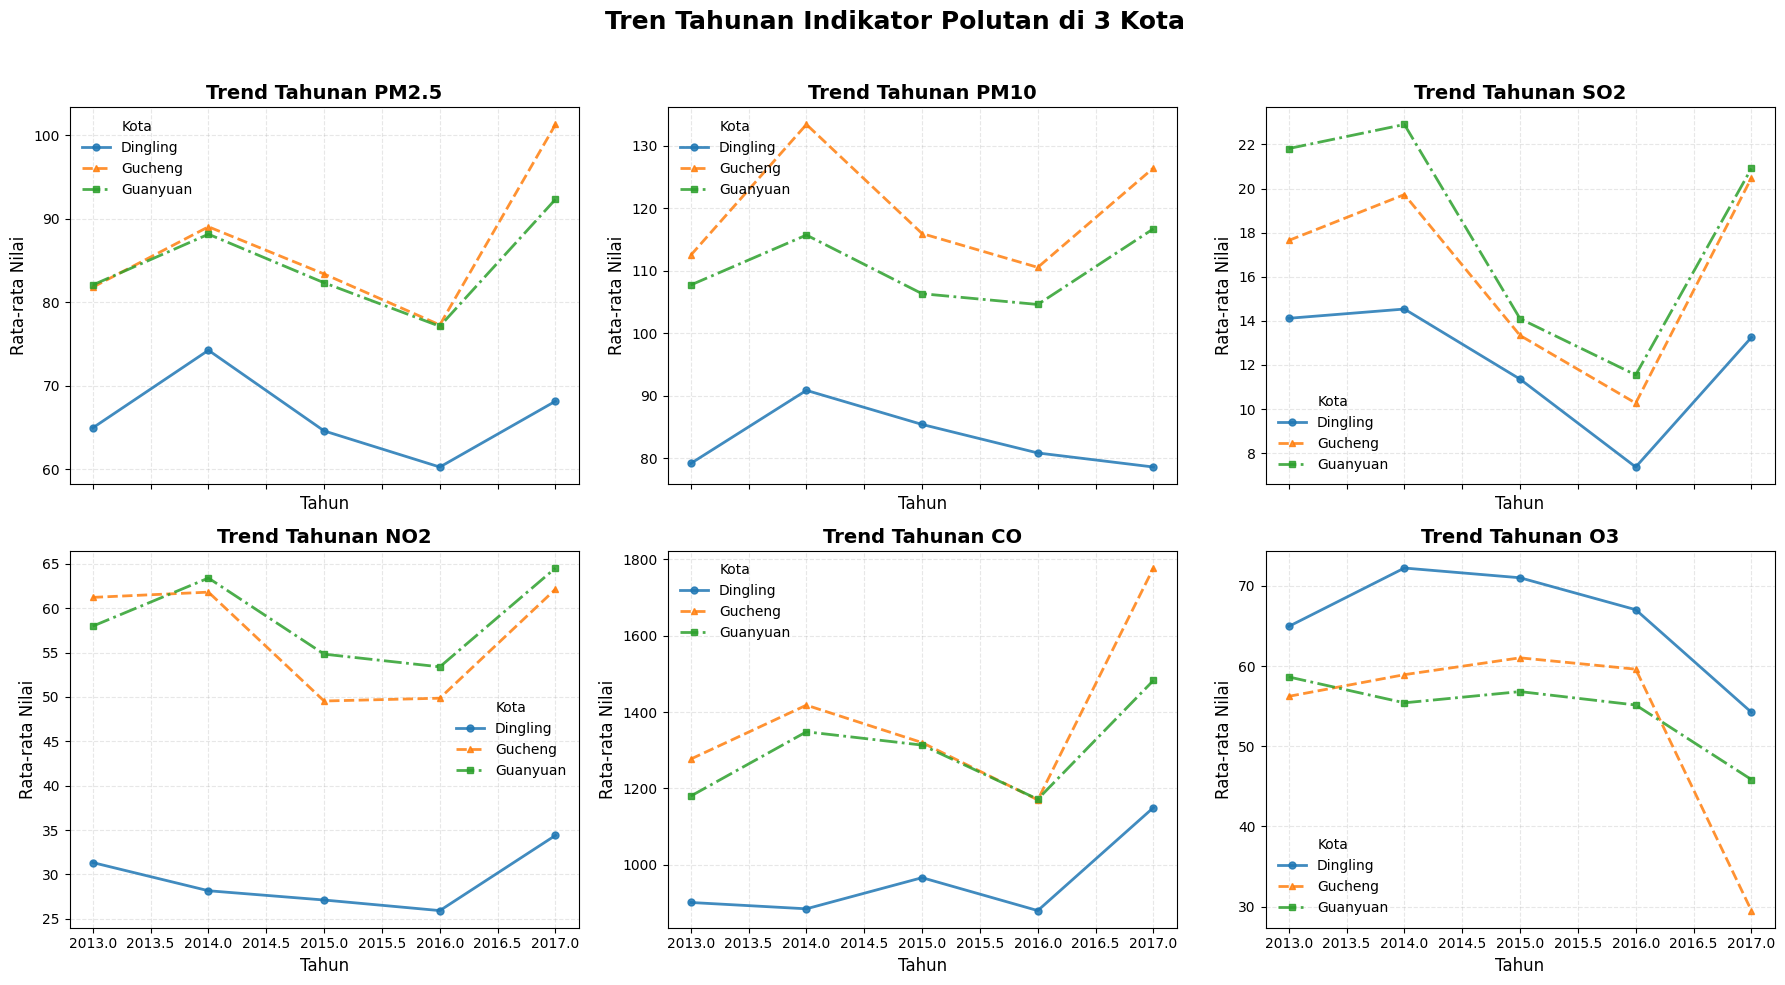

In [ ]:
plt.style.use("default")
sns.set_palette("muted")

# Daftar parameter polutan
parameters = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

city_styles = {
    "Dingling": {"marker": "o", "linestyle": "-", "color": "#1f77b4", "linewidth": 2, "markersize": 5, "alpha": 0.85},
    "Gucheng": {"marker": "^", "linestyle": "--", "color": "#ff7f0e", "linewidth": 2, "markersize": 5, "alpha": 0.85},
    "Guanyuan": {"marker": "s", "linestyle": "-.", "color": "#2ca02c", "linewidth": 2, "markersize": 5, "alpha": 0.85},
}

# Membuat figure dengan 2 baris dan 3 kolom (6 grafik)
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True)
axes = axes.flatten()

# Looping untuk tiap parameter dan masing-masing kota
for i, param in enumerate(parameters):
    ax = axes[i]

    for city, style in city_styles.items():
        city_data = yearly_avg[yearly_avg.index.get_level_values(1) == city]

        # Plot
        ax.plot(city_data.index.get_level_values(0), city_data[param],
                marker=style["marker"],
                linestyle=style["linestyle"],
                color=style["color"],
                alpha=style["alpha"],
                linewidth=style["linewidth"],
                markersize=style["markersize"],
                label=city)

    ax.set_title(f"Trend Tahunan {param}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Tahun", fontsize=12)
    ax.set_ylabel("Rata-rata Nilai", fontsize=12)

    # Atur legenda
    ax.legend(title="Kota", fontsize=10, loc="best", frameon=False)

    # Grid
    ax.grid(True, linestyle="--", alpha=0.3)

fig.suptitle("Tren Tahunan Indikator Polutan di 3 Kota", fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Mengatur layout agar tidak bertumpuk
plt.show()


**Insight:** \
Dari hasil di atas dapat dilihat bahwa : \
1. PM2.5 :
- Gucheng cenderung memiliki nilai PM2.5 terttinggi dan pada tahun-tahun akhir meningkat secara signifikan
- Guanyuan berada di kisaran menengah tetapi saat tahun akhir menunjukkan tren naik
- Dingling cenderung paling rendah, meskin saat tengah periode sempat naik-turun
2. PM10
- Gucheng konsisten menempati posisi tertinggi dan  mencapai puncak saat pertengah periode, lalu turun dan naik kembali
- Guanyuan berada di posisi menengah, sempat ada tren turun lalu meningkat lagi di akhir
- Dingling menjadi yang paling rendah dan cenderung terus menurun
3. SO2
- Guanyuan secara umum paling tinggi. Sempat terjadi penurunan yang besar, tetapi di tahun terakhir kembali meningkat
- Gucheng di posisi menengah, turun drastis di satu periode, lalu naik lagi
- Dingling cenderung paling rendah, meski naik-turun
4. NO2
- Guanyuan memiliki nilai NO2 yang tinggi, memiliki puncak di sekitar 2013-2014 lalu menurun di 2015 kemudian naik hingga 2017
- Gucheng memiliki pola yang sama dengan Guanyuan
- Dingling memiliki nilai terendah di antar ketiga kota. Cenderung stabil, sempat menurun dan kembali naik
5. CO
- Guanyuan mulai cukup tinggi tetapi akhirnya turun dan kembali naik di 2017
- Gucheng memiliki puncak di tahun awal lalu turun di 2016 dan kembali naik di 2017
- Dingling turun pada tahun 2014-2016 dan kembali naik di 2017
6. O3
- Guanyuan mulai di kisaran 50 lalu naik di tahun 2015 dan perlahan turun di 2017
- Gucheng mulai di angka 55, stabil hingga 2016 dan menurun drastis di 2017
- Dingling tertinggi hingga 2014 lalu menurun secara bertahap di 2017

### Pertanyaan 2:

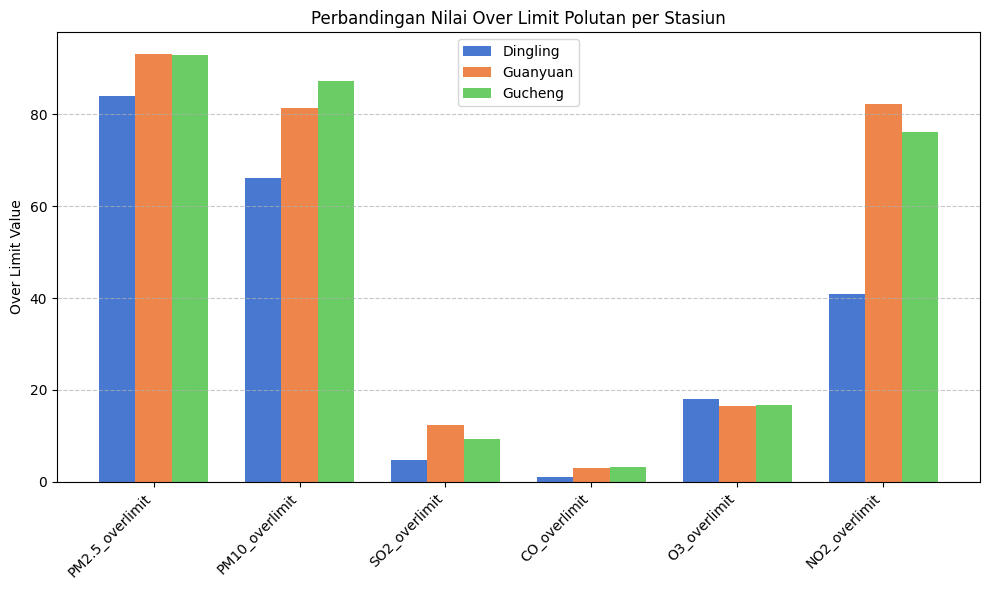

In [ ]:
# Daftar polutan
pollutants = ['PM2.5_overlimit', 'PM10_overlimit', 'SO2_overlimit',
              'CO_overlimit', 'O3_overlimit', 'NO2_overlimit']

# Membuat array posisi untuk sumbu x
x = np.arange(len(pollutants))
width = 0.25  # lebar bar

# Membuat figure dan axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar untuk setiap stasiun
for i, station in enumerate(final.index):
    ax.bar(x + i * width,
           final.loc[station, pollutants],
           width=width,
           label=station)

# Menyesuaikan sumbu x dengan label polutan
ax.set_xticks(x + width)
ax.set_xticklabels(pollutants, rotation=45, ha='right')

# Menambahkan label dan judul
ax.set_ylabel("Over Limit Value")
ax.set_title("Perbandingan Nilai Over Limit Polutan per Stasiun")
ax.legend()

# Menambahkan grid untuk sumbu y
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

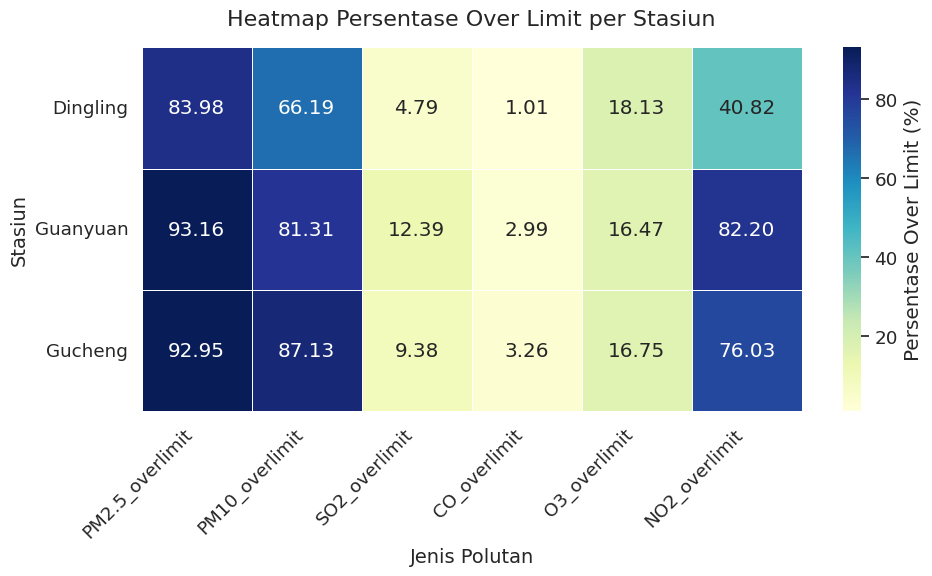

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)

ax = sns.heatmap(
    final,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Persentase Over Limit (%)'}
)

# tambahkan judul dan label sumbu
ax.set_title("Heatmap Persentase Over Limit per Stasiun", fontsize=16, pad=16)
ax.set_xlabel("Jenis Polutan", fontsize=14)
ax.set_ylabel("Stasiun", fontsize=14)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

**Insight:** \
Dari hasil yang di dapatkan :
1. Dingling
Memiliki PM2.5, PM10, NO2, dan SO2 yang lebih rendah dibandingkan kota lain, tetapi persentase dari PM2.5 nya masih tinggi sekitar 84%. Kadar O3 sedikit lebih tinggi (18%) dari kota lain, hal ini kemungkinan dipengaruhi oleh kondisi meteorolgi atau tingkat emisi prekursor
2. Guanyuan
Memiliki PM2.5 dan PM10 yang sangat tinggi (93% dan 81%). Memiliki NO2 paling tinggi (82%) serta SO2 tertinggi (12%). Hal ini membuat Guanyuan memiliki kualitas udara yang kurang sehat dengan adanya polusi yang pekat.
3. Gucheng
Memiliki PM2.5 dan PM10 yang sangat tinggi (93% dan 87%). Memiliki NO2 yang tinggi (76%). Hal ini membuat Gucheng memiliki polusi udara yang cukup tinggi dan kualitas udara yang kurang sehat.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 \
Secara umum, Gucheng dan Guanyuan cenderung memiliki konsentrasi polutan yang lebih tinggi dibanding Dingling, terutama untuk PM2.5, PM10, dan NO2. Pada akhir periode (2017), terdapat kecenderungan rebound pada beberapa polutan seperti PM2.5, NO2, dan CO, yang mengindikasikan kemungkinan peningkatan aktivitas industri atau transportasi. Secara keseluruhan, data tren menunjukkan bahwa perbaikan kualitas udara perlu difokuskan pada kota dengan konsentrasi polutan tinggi (Gucheng dan Guanyuan), dengan perhatian khusus pada peningkatan emisi di akhir periode studi.
- Conclution pertanyaan 2 \
Dingling Memiliki PM2.5, PM10, NO2, dan SO2 yang lebih rendah dibandingkan kota lain, tetapi persentase dari PM2.5 nya masih tinggi sekitar 84%. Kadar O3 sedikit lebih tinggi (18%) dari kota lain, hal ini kemungkinan dipengaruhi oleh kondisi meteorolgi atau tingkat emisi prekursor. Guanyuan Memiliki PM2.5 dan PM10 yang sangat tinggi (93% dan 81%). Memiliki NO2 paling tinggi (82%) serta SO2 tertinggi (12%). Hal ini membuat Guanyuan memiliki kualitas udara yang kurang sehat dengan adanya polusi yang pekat. Gucheng Memiliki PM2.5 dan PM10 yang sangat tinggi (93% dan 87%). Memiliki NO2 yang tinggi (76%). Hal ini membuat Gucheng memiliki polusi udara yang cukup tinggi dan kualitas udara yang kurang sehat.